# Samostatná práce - cvičení č. 9 (ZDO)
## Klasifikace objektů

Jan Burian

## Imports

In [8]:
import skimage
import skimage.color
import skimage.measure
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors
from skimage.feature import corner_fast, corner_peaks

## Methods


In [9]:
def count_object_area(object):
    number_white_pixels = 0
    for i in range(len(object)):
        for j in range(len(object[0])):
            if object[i,j] == 1:
                number_white_pixels += 1

    return number_white_pixels


def count_perimeter(object):
    object_int = object.astype(int)
    perimeter = skimage.measure.perimeter(object_int, 4)

    return perimeter


def get_train_data(classes):
    train_data = []
    for class_ in classes:
        for object in class_:
            features = count_object_features(object)
            train_data.append(features)

    return np.array(train_data)


def count_object_features(object):
    area = count_object_area(object)
    perimeter = count_perimeter(object)
    incompatibility = (perimeter ** 2) / area
    # corners = corner_fast(object, n=10, threshold=0)
    # number_corners = len(corner_peaks(corners))
    # plt.imshow(corners)
    # plt.show()
    # features = [incompatibility, area, perimeter]
    features = [incompatibility]
    # plt.imshow(object)
    # plt.show()

    return features


def get_target_data(classes):
    target_data = []
    index = -1
    for class_ in classes:
        index += 1
        for i in range(len(class_)):
            target_data.append(index)

    return target_data


def load_train_data(url: str):
    # URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
    img = skimage.io.imread(url, as_gray=True)
    # plt.imshow(img, cmap='gray')
    # plt.show()

    return img


def load_test_data(test_data_url, filenames):
    test_data = []
    for filename in filenames:
        img = skimage.io.imread(test_data_url + filename, as_gray=True)
        test_data.append(img)

    return test_data


def get_features_test_data(test_data):
    object_features = []
    for test_img in test_data:
        test_img_object_features = []
        test_img_labeled = skimage.measure.label(test_img > 0.5)
        number_labeled_objects = (test_img_labeled.max())  # 0 = background
        # plt.imshow(test_img_labeled, cmap='gray')
        # plt.show()
        objects = []
        for label in range(1, number_labeled_objects+1):
            objects.append(test_img_labeled == label)

        for object in objects:
            features = count_object_features(object)
            test_img_object_features.append(features)

        object_features.append(test_img_object_features)

    return np.array(object_features)


def predict_data(knn, features_test_data, filenames, classes_str):
    index = 0
    for features in features_test_data:
        predictions = []
        for feature in features:
            prediction = knn.predict([feature])
            class_index = prediction[0]
            object = classes_str[class_index]
            predictions.append(object)
        print(filenames[index] + ": " + str(predictions))
        index += 1

def print_test_data():
  pass

### Training

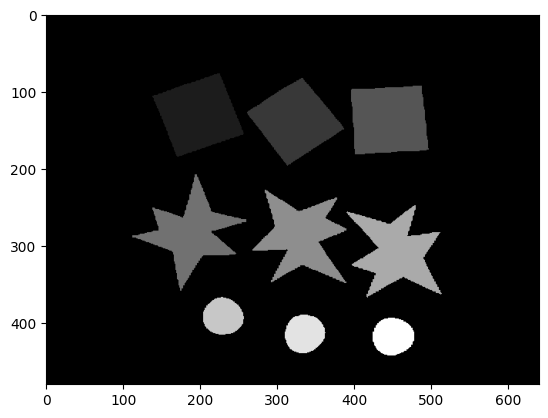

[[18.43017198]
 [18.4203992 ]
 [16.52882039]
 [51.82944879]
 [52.96671105]
 [51.33541013]
 [14.09650189]
 [13.98498911]
 [14.45219664]]


In [10]:
# Loading training data
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/ctverce_hvezdy_kolecka.jpg"
img = load_train_data(URL)

# Labelling objects
img_labeled = skimage.measure.label(img > 0.5)
plt.imshow(img_labeled, cmap='gray')
plt.show()

# test = skimage.measure.regionprops(img_labeled)

# Extracting objects (0 = background)
squares = [img_labeled == 1, img_labeled == 2, img_labeled == 3]
stars = [img_labeled == 4, img_labeled == 5, img_labeled == 6]
circles = [img_labeled == 7, img_labeled == 8, img_labeled == 9]

# Classes (0 = square, 1 = star, 2 = circle)
classes = np.array([squares, stars, circles])
classes_str = ["square", "star", "circle"]

# Training data
train_data = get_train_data(classes)
target_data = get_target_data(classes)

print(train_data)

### Classifier

In [11]:
# Classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(train_data, target_data)


KNeighborsClassifier()

### Testing 

In [12]:
# Testing data
test_data_url = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/"
filenames = ["01.jpg", "02.jpg", "03.jpg", "04.jpg", "05.jpg", "06.jpg", "07.jpg", "08.jpg", "09.jpg",
              "10.jpg", "11.jpg", "12.jpg", "13.jpg", "14.jpg", "15.jpg", "16.jpg", "17.jpg"]
test_data = load_test_data(test_data_url, filenames)
features_test_data = get_features_test_data(test_data)
predict_data(knn, features_test_data, filenames, classes_str)

01.jpg: ['square', 'square', 'star', 'circle', 'circle', 'square', 'circle']
02.jpg: ['square', 'circle', 'square', 'circle', 'circle', 'circle', 'circle', 'circle']
03.jpg: ['square', 'circle', 'square', 'star']
04.jpg: ['circle', 'square', 'circle', 'circle', 'square']
05.jpg: ['square', 'star', 'star', 'square', 'circle', 'circle']
06.jpg: ['square', 'circle', 'circle', 'square', 'square', 'circle', 'circle', 'circle']
07.jpg: ['square', 'circle', 'square', 'circle', 'circle', 'circle', 'circle']
08.jpg: ['star', 'circle', 'square', 'circle']
09.jpg: ['square', 'square', 'square', 'circle', 'square', 'square', 'circle', 'circle']
10.jpg: ['star', 'square', 'square', 'square', 'square', 'circle', 'circle', 'circle']
11.jpg: ['square', 'star', 'circle', 'square']
12.jpg: ['square', 'star', 'circle', 'circle']
13.jpg: ['square', 'star', 'circle', 'square']
14.jpg: ['square', 'circle', 'square', 'star']
15.jpg: ['square', 'star', 'circle']
16.jpg: ['square', 'star', 'circle']
17.jpg: ['

<ipython-input-9-476a44203483>:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(object_features)
